In [1]:
import numpy as np # use for numerical calcuation,array,function
import pandas as pd # use for data manipulation and analysis 
import matplotlib.pyplot as plt # use for plot visualization
import seaborn as sns # use for data visualization
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(20)


,bodyTemp,bodyPain,runnyNose,diffBreath,o2Saturation,travelHistory,age,LossofTasteSmell,vomiting,Diarrhea,infectionProb
0,101.441399,1,0,-1,89,1,36,0,0,0,1
1,100.982812,0,0,-1,95,0,33,0,0,0,0
2,101.185510,0,1,-1,92,0,96,1,0,0,0
3,99.841183,1,1,1,78,1,65,1,0,1,1
4,99.167192,0,0,1,76,1,84,0,1,0,1
5,101.137272,1,1,0,56,1,67,0,0,1,1
6,99.573732,0,1,-1,66,0,48,0,0,0,0
7,100.691629,1,0,1,90,1,75,1,1,1,1
8,101.973323,1,0,1,61,1,49,0,0,0,0
9,98.749612,1,1,0,50,1,10,0,0,1,1


# DATASET  DESCRIPTION:
bodyTemp : Temprature o the body

bodyPain: Wether patient is feeling body pain or not

runnyNose: Wether nose is runny or not

diffBreath: Wether patient feeling difficulty in breathing

o2Saturation: the measure of O2 by oximeter

travelHistory: wether person have travel history or not

age: Age of the person

LossofTasteSmell: wether the person lost sense of taste and smell or not

Diarrhea: Wether person is suffering from diarrhea or not


infecProb : Wether corona present or not

In [4]:
df.tail()

,bodyTemp,bodyPain,runnyNose,diffBreath,o2Saturation,travelHistory,age,LossofTasteSmell,vomiting,Diarrhea,infectionProb
2494,99.947438,0,1,1,95,0,17,1,1,1,0
2495,98.350472,0,0,0,92,0,84,0,0,0,0
2496,100.196342,0,1,1,92,0,72,1,1,0,0
2497,98.933927,0,0,-1,88,1,98,0,0,1,1
2498,100.194224,1,0,0,61,1,8,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bodyTemp          2499 non-null   float64
 1   bodyPain          2499 non-null   int64  
 2   runnyNose         2499 non-null   int64  
 3   diffBreath        2499 non-null   int64  
 4   o2Saturation      2499 non-null   int64  
 5   travelHistory     2499 non-null   int64  
 6   age               2499 non-null   int64  
 7   LossofTasteSmell  2499 non-null   int64  
 8   vomiting          2499 non-null   int64  
 9   Diarrhea          2499 non-null   int64  
 10  infectionProb     2499 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 214.9 KB


In [6]:
df['bodyTemp'].value_counts()

101.441399    99
100.982812    97
99.841183     66
101.137272    64
99.167192     64
              ..
100.753163     1
101.140293     1
101.790601     1
98.732287      1
99.832280      1
Name: bodyTemp, Length: 532, dtype: int64

In [7]:
df.describe()

,bodyTemp,bodyPain,runnyNose,diffBreath,o2Saturation,travelHistory,age,LossofTasteSmell,vomiting,Diarrhea,infectionProb
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.0000,2499.000000,2499.000000
mean,100.138546,0.422569,0.601841,-0.010804,78.124050,0.519008,46.514206,0.259704,0.5002,0.455782,0.536214
std,1.096522,0.494067,0.489617,0.848091,15.053887,0.499739,26.990734,0.438560,0.5001,0.498141,0.498787
min,98.015804,0.000000,0.000000,-1.000000,50.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000
25%,99.179472,0.000000,0.000000,-1.000000,66.000000,0.000000,25.000000,0.000000,0.0000,0.000000,0.000000
50%,100.196342,0.000000,1.000000,0.000000,83.000000,1.000000,42.000000,0.000000,1.0000,0.000000,1.000000
75%,101.137272,1.000000,1.000000,1.000000,92.000000,1.000000,67.000000,1.000000,1.0000,1.000000,1.000000
max,101.998962,1.000000,1.000000,1.000000,95.000000,1.000000,100.000000,1.000000,1.0000,1.000000,1.000000


## Spliting the data


In [8]:
import numpy as np

In [9]:
def data_split(data,ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size= int(len(data)*ratio)
    test_indices= shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train,test=data_split(df,0.2)

In [11]:
train

,bodyTemp,bodyPain,runnyNose,diffBreath,o2Saturation,travelHistory,age,LossofTasteSmell,vomiting,Diarrhea,infectionProb
461,99.825482,0,1,-1,92,0,19,0,1,0,0
109,99.573732,0,1,-1,66,0,48,0,0,0,0
2296,99.831461,1,0,0,75,1,5,0,1,1,0
354,101.152159,0,1,0,92,0,25,0,1,0,0
266,100.691629,1,0,1,90,1,75,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1638,98.216911,1,0,1,70,1,62,0,1,0,1
1095,101.051166,0,1,1,67,0,14,0,1,1,1
1130,100.308015,0,0,-1,95,1,32,0,1,0,0
1294,100.982812,0,0,-1,95,0,33,0,0,0,0


In [12]:
test


,bodyTemp,bodyPain,runnyNose,diffBreath,o2Saturation,travelHistory,age,LossofTasteSmell,vomiting,Diarrhea,infectionProb
2319,98.357745,0,1,0,95,1,8,0,0,1,0
1865,100.601893,1,1,1,88,0,97,0,0,1,1
902,101.501663,0,0,-1,50,0,25,0,0,0,0
2240,100.763833,1,0,-1,52,0,59,0,1,1,1
1285,101.051166,0,1,1,67,0,14,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,98.933927,0,0,-1,88,1,98,0,0,1,1
2054,101.548704,0,1,1,65,1,61,0,1,0,1
1860,101.493547,1,1,0,73,1,32,1,0,0,1
1862,98.482715,0,1,1,52,0,44,0,1,1,0


# CORRELATION

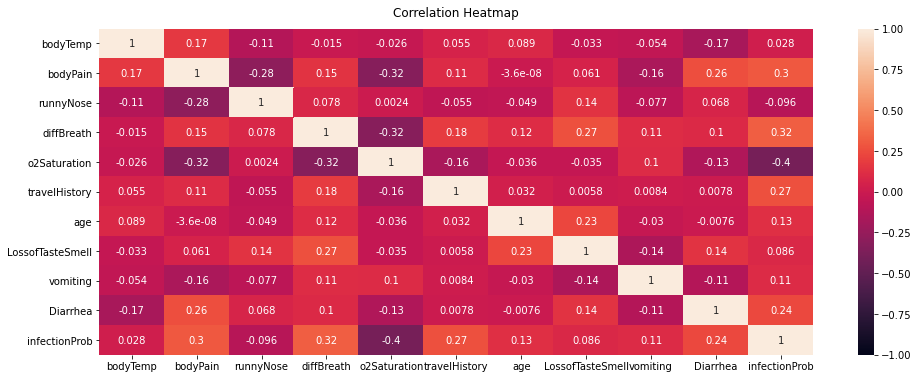

In [13]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## convert in to numpy array

In [14]:
x_train=train[['bodyTemp','bodyPain','runnyNose','diffBreath','o2Saturation','travelHistory','age','LossofTasteSmell','vomiting','Diarrhea']].to_numpy()
print(x_train)
x_train.shape

[[ 99.8254821    0.           1.         ...   0.           1.
    0.        ]
 [ 99.5737325    0.           1.         ...   0.           0.
    0.        ]
 [ 99.83146071   1.           0.         ...   0.           1.
    1.        ]
 ...
 [100.3080155    0.           0.         ...   0.           1.
    0.        ]
 [100.982812     0.           0.         ...   0.           0.
    0.        ]
 [101.9332921    0.           0.         ...   1.           1.
    1.        ]]


(2000, 10)

In [15]:
x_test=test[['bodyTemp','bodyPain','runnyNose','diffBreath','o2Saturation','travelHistory','age','LossofTasteSmell','vomiting','Diarrhea']].to_numpy()
print(x_test)
x_test.shape

[[ 98.35774456   0.           1.         ...   0.           0.
    1.        ]
 [100.6018931    1.           1.         ...   0.           0.
    1.        ]
 [101.5016629    0.           0.         ...   0.           0.
    0.        ]
 ...
 [101.493547     1.           1.         ...   1.           0.
    0.        ]
 [ 98.48271543   0.           1.         ...   0.           1.
    1.        ]
 [ 99.50130631   0.           1.         ...   0.           0.
    1.        ]]


(499, 10)

In [16]:
x_test=test[['bodyTemp','bodyPain','runnyNose','diffBreath','o2Saturation','travelHistory','age','LossofTasteSmell','vomiting','Diarrhea']].to_numpy()
print(x_test)
x_test.shape

[[ 98.35774456   0.           1.         ...   0.           0.
    1.        ]
 [100.6018931    1.           1.         ...   0.           0.
    1.        ]
 [101.5016629    0.           0.         ...   0.           0.
    0.        ]
 ...
 [101.493547     1.           1.         ...   1.           0.
    0.        ]
 [ 98.48271543   0.           1.         ...   0.           1.
    1.        ]
 [ 99.50130631   0.           1.         ...   0.           0.
    1.        ]]


(499, 10)

In [17]:
x_test=test[['bodyTemp','bodyPain','runnyNose','diffBreath','o2Saturation','travelHistory','age','LossofTasteSmell','vomiting','Diarrhea']].to_numpy()
print(x_test)
x_test.shape

[[ 98.35774456   0.           1.         ...   0.           0.
    1.        ]
 [100.6018931    1.           1.         ...   0.           0.
    1.        ]
 [101.5016629    0.           0.         ...   0.           0.
    0.        ]
 ...
 [101.493547     1.           1.         ...   1.           0.
    0.        ]
 [ 98.48271543   0.           1.         ...   0.           1.
    1.        ]
 [ 99.50130631   0.           1.         ...   0.           0.
    1.        ]]


(499, 10)

## Reshape the data


In [18]:
y_test=test[['infectionProb']].to_numpy().reshape(499,)
y_train=train[['infectionProb']].to_numpy().reshape(2000,)



In [19]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [21]:
p1=[]

# MODELING

# NAIVE BAYES CLASSIFIER

In [22]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_pred1= model.predict(x_test) 
print(y_pred1)


[0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1
 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 0 

confusion matrix for naive bayes classifier is
  [[155  65]
 [ 91 188]] 


              precision    recall  f1-score   support

           0       0.63      0.70      0.67       220
           1       0.74      0.67      0.71       279

    accuracy                           0.69       499
   macro avg       0.69      0.69      0.69       499
weighted avg       0.69      0.69      0.69       499

accuracy for naive bayes classifier is : 0.687374749498998


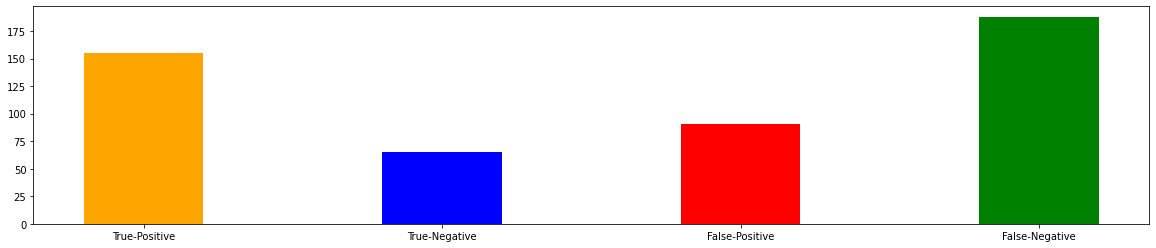

In [23]:
matrix = confusion_matrix(y_test,y_pred1)
report = classification_report(y_test,y_pred1)
from sklearn.metrics import accuracy_score
s1=accuracy_score(y_test,y_pred1)

print("confusion matrix for naive bayes classifier is\n ", matrix, "\n\n")
print(report)
print("accuracy for naive bayes classifier is :",s1)

nb1=[]
nb2=['True-Positive','True-Negative','False-Positive','False-Negative']
nb1.append(matrix[0][0])
nb1.append(matrix[0][1])
nb1.append(matrix[1][0])
nb1.append(matrix[1][1])
plt.figure(figsize=(20,4))
plt.bar(nb2,nb1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

# SUPPORT VECTOR MACHINE

In [33]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(x_test)
print(y_pred2)


[0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 0 

confusion matrix support vector machine is 
  [[158  62]
 [ 75 204]] 


              precision    recall  f1-score   support

           0       0.68      0.72      0.70       220
           1       0.77      0.73      0.75       279

    accuracy                           0.73       499
   macro avg       0.72      0.72      0.72       499
weighted avg       0.73      0.73      0.73       499

accuracy for support vector machine is : 0.7254509018036072


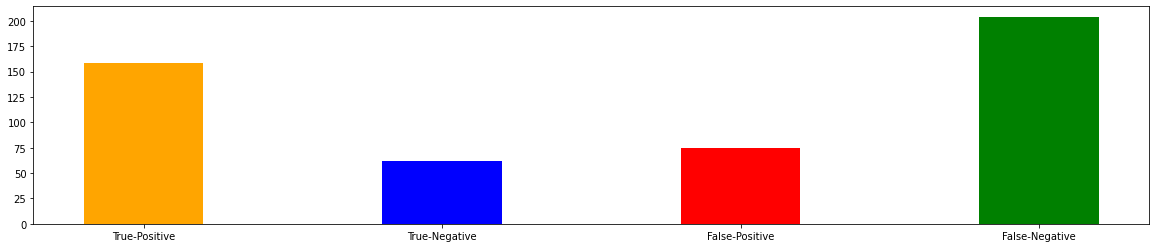

In [34]:

s2=accuracy_score(y_test,y_pred2)
matrix = confusion_matrix(y_test,y_pred2)
report = classification_report(y_test,y_pred2)

print("confusion matrix support vector machine is \n ", matrix, "\n\n")
print(report)
print("accuracy for support vector machine is :",s2)

svm1=[]
svm2=['True-Positive','True-Negative','False-Positive','False-Negative']
svm1.append(matrix[0][0])
svm1.append(matrix[0][1])
svm1.append(matrix[1][0])
svm1.append(matrix[1][1])
plt.figure(figsize=(20,4))
plt.bar(svm2,svm1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

## LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)
print(y_pred3)


[0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 0 

confusion matrix
 [[152  68]
 [ 63 216]] 

Accuracy of logistic regression model = 0.7374749498997996 


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       220
           1       0.76      0.77      0.77       279

    accuracy                           0.74       499
   macro avg       0.73      0.73      0.73       499
weighted avg       0.74      0.74      0.74       499



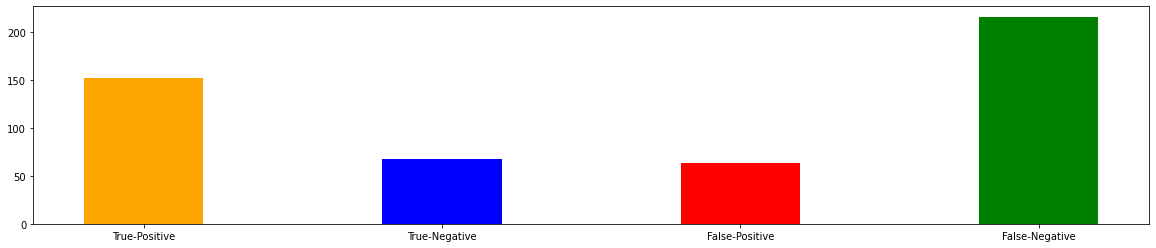

In [88]:
cm = confusion_matrix(y_test,y_pred3)
print("confusion matrix\n",cm,"\n")
s3=accuracy_score(y_test,y_pred3)
print("Accuracy of logistic regression model =" ,s3,"\n\n")
report = classification_report(y_test, y_pred3)
print(report)

lr1=[]
lr2=['True-Positive','True-Negative','False-Positive','False-Negative']
lr1.append(cm[0][0])
lr1.append(cm[0][1])
lr1.append(cm[1][0])
lr1.append(cm[1][1])
plt.figure(figsize=(20,4))
plt.bar(lr2,lr1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

# Random Forest  Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(x_train, y_train)
y_pred4=rfc1.predict(x_test)
print(y_pred4)


[0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 0 0 0 1 1 1 0 

confusion matrix
 [[195  25]
 [ 27 252]] 

Accuracy of Random forest model = 0.8957915831663327 


              precision    recall  f1-score   support

           0       0.88      0.89      0.88       220
           1       0.91      0.90      0.91       279

    accuracy                           0.90       499
   macro avg       0.89      0.89      0.89       499
weighted avg       0.90      0.90      0.90       499



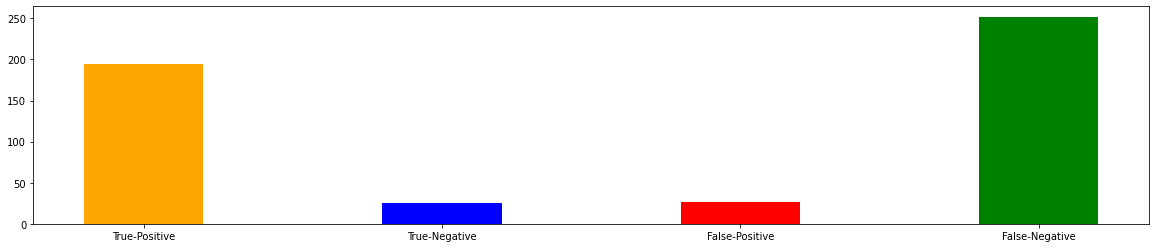

In [90]:

cm = confusion_matrix(y_test,y_pred4)
print("confusion matrix\n",cm,"\n")

s4=accuracy_score(y_test,y_pred4)
print("Accuracy of Random forest model =" ,s4,"\n\n")
report = classification_report(y_test, y_pred4)
print(report)

rfc1=[]
rfc2=['True-Positive','True-Negative','False-Positive','False-Negative']
rfc1.append(cm[0][0])
rfc1.append(cm[0][1])
rfc1.append(cm[1][0])
rfc1.append(cm[1][1])
plt.figure(figsize=(20,4))
plt.bar(rfc2,rfc1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

# DECISION TREE 

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred5=classifier.predict(x_test)
print(y_pred5)


[0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 1 0 

confusion matrix for decision tree is
  [[196  24]
 [ 23 256]] 


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       220
           1       0.91      0.92      0.92       279

    accuracy                           0.91       499
   macro avg       0.90      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499

accuracy for decision tree is : 0.905811623246493


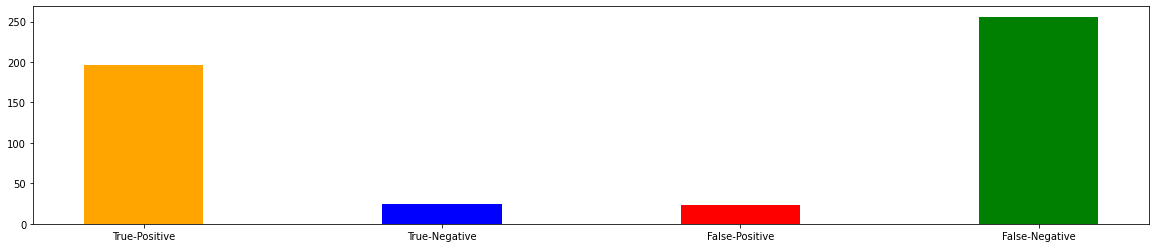

In [92]:
matrix = confusion_matrix(y_test,y_pred5)
report = classification_report(y_test,y_pred5)
s5=accuracy_score(y_test,y_pred5)
print("confusion matrix for decision tree is\n ", matrix, "\n\n")
print(report)
print("accuracy for decision tree is :",s5)

dt1=[]
dt2=['True-Positive','True-Negative','False-Positive','False-Negative']
dt1.append(matrix[0][0])
dt1.append(matrix[0][1])
dt1.append(matrix[1][0])
dt1.append(matrix[1][1])
plt.figure(figsize=(20,4))
plt.bar(dt2,dt1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

# K NEAREST NEIGHBHOR

In [93]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
knn=neighbors.KNeighborsClassifier(n_neighbors=15,weights='uniform')
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

print(prediction)

[0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 0 0 0 1 1 1 0 

confusion matrix for knn is
  [[187  33]
 [ 11 268]] 


              precision    recall  f1-score   support

           0       0.94      0.85      0.89       220
           1       0.89      0.96      0.92       279

    accuracy                           0.91       499
   macro avg       0.92      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499

accuracy for knn is : 0.9118236472945892


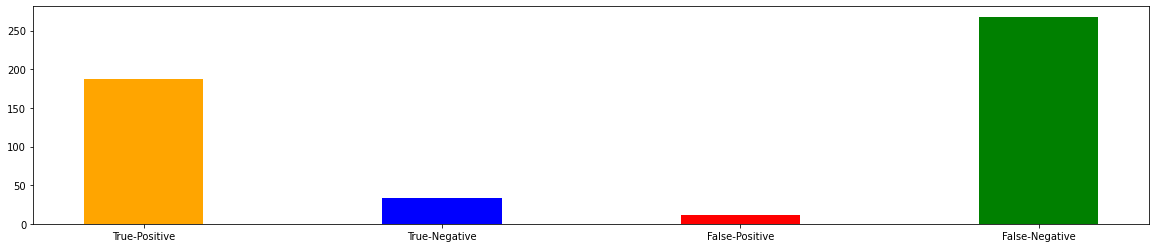

In [95]:
s6=accuracy_score(y_test,prediction)
matrix = confusion_matrix(y_test,prediction)
report = classification_report(y_test,prediction)

print("confusion matrix for knn is\n ", matrix, "\n\n")
print(report)
print("accuracy for knn is :",s6)

knn1=[]
knn2=['True-Positive','True-Negative','False-Positive','False-Negative']
knn1.append(matrix[0][0])
knn1.append(matrix[0][1])
knn1.append(matrix[1][0])
knn1.append(matrix[1][1])
plt.figure(figsize=(20,4))
plt.bar(knn2,knn1,width=0.4,color=['orange','blue','Red','green'])

plt.show()

In [96]:
p1=[]

In [97]:
p1.append(s1)
p1.append(s2)
p1.append(s3)
p1.append(s4)
p1.append(s5)
p1.append(0.9104)
p1.append(s6)


In [98]:
p2=['Naive bayes classification','Support vector machine','Logistic regression','Random forest ','Decision tree','ANN','KNN']

# ACCURACY COMPARISION

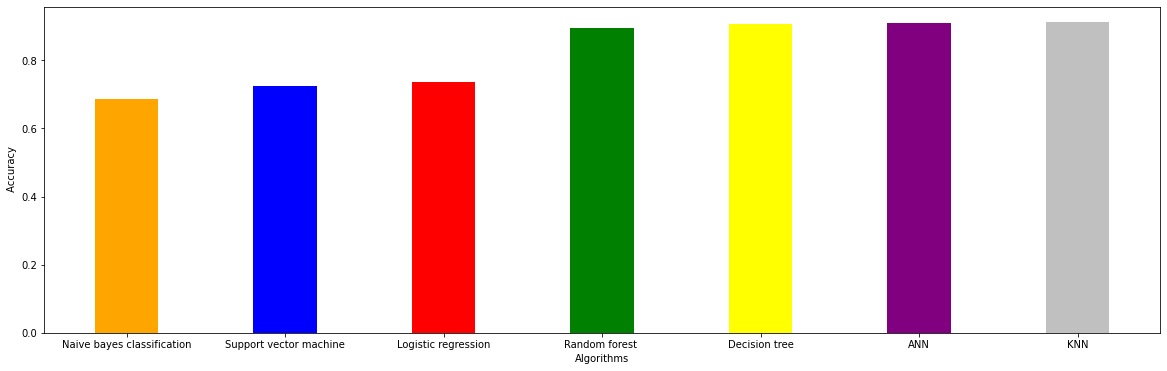

In [99]:
plt.figure(figsize=(20,6))
plt.bar(p2,p1,width=0.4,color=['orange','blue','Red','green','yellow','purple','Silver'])
plt.xlabel('Algorithms')
plt.ylabel(' Accuracy')
plt.show()
